<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means**
Aprendizaje no supervisado.
- El algoritmo identifica los grupos que hay. 
- Toma como base la distancia.
- Se debe estandarizar.
- Inconvenientes:
 - Escogencia del número de grupos.
 - Escogencia de las semillas aleatorias.
- Correr el algoritmo varias veces para elegir centroides diferentes.
- Buscar que los centroides iniciales que se escojan estén separados.

# **K-Means++**
Ubicar los centroides iniciales lo más alejado posible.
Pasos:


1.   Elegir un centroide aleatorio. 
2.   Medir la distancia de cada uno de los datos a ese centroide.
3.   Seleccionar otro centroide, usando una distribución ponderada. Mayor probabilidad de ser escogido como el segundo centroide.



In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

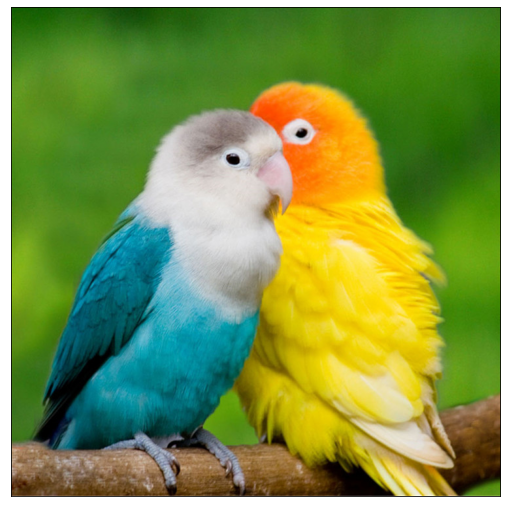

In [34]:
path = 'drive/MyDrive/ML-Models/data1/pajaros.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (16,9))
plt.imshow(image)
plt.xticks([]);
plt.yticks([]);

In [35]:
pixel_values = image.reshape((-1,3))
print(pixel_values.shape)
pixel_values = np.float32(pixel_values)

(562500, 3)


In [36]:
 #Que se salga porque los centroides no se mueven o por número de iteraciones.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.2)

k = 4 #Número de clusters.

#Modo antiguo de ejeutar el código 10 veces.
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# K-means con scikitlearn.

In [37]:
centers = np.uint8(centers)
print(centers)
print(labels.shape)
labels = labels.flatten()
print(labels.shape)

[[ 12 117 131]
 [193 191 179]
 [ 76 117  26]
 [231 188  20]]
(562500, 1)
(562500,)


In [38]:
segmented_image = centers[labels]
print(segmented_image.shape)

(562500, 3)


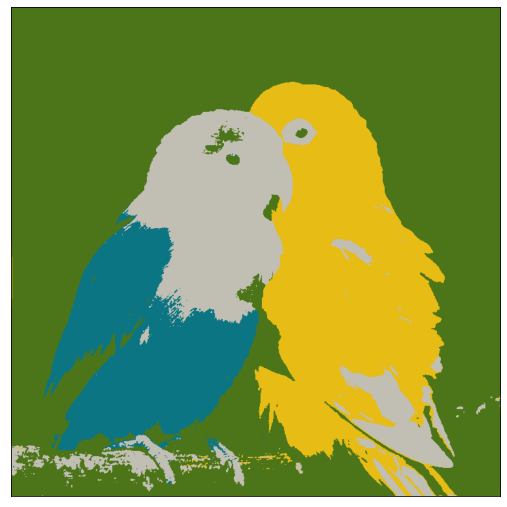

In [39]:
segmented_image = segmented_image.reshape(image.shape)
plt.figure(figsize = (16,9))
plt.imshow(segmented_image)
plt.xticks([]);
plt.yticks([]);

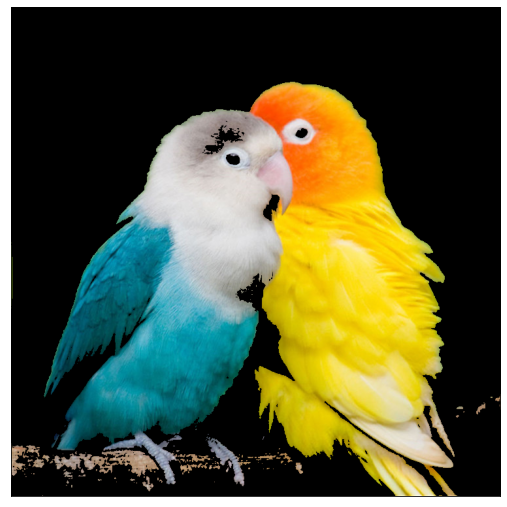

In [45]:
#Escoger cada una de las capas y pintarlas de negro.

#Copia de la imagen para que no apunte a la misma dirección de memoria.
masked_image = np.copy(image)
masked_image = masked_image.reshape(-1,3)
cluster = 2
masked_image[labels == cluster] = [0,0,0]
masked_image = masked_image.reshape(image.shape)
plt.figure(figsize = (16,9))
plt.imshow(masked_image)
plt.xticks([]);
plt.yticks([]);